<a href="https://colab.research.google.com/github/Ritika-2706/mnist-classification/blob/main/Ex03_minist_classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:

Register Number:

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

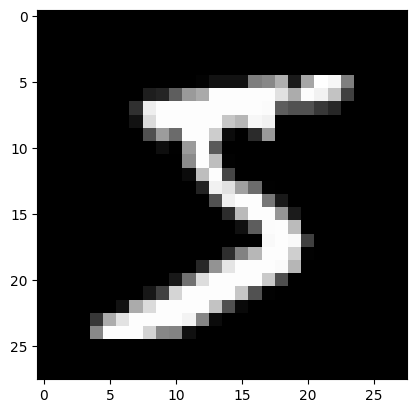

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

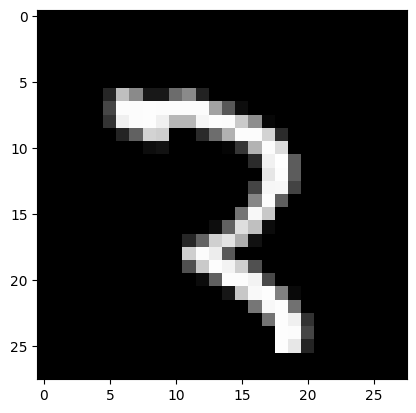

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name:

Register Number:

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation='relu'))
model.add(layers.Dense(11,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │          48,681 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,231 (192.31 KB)

 Trainable params: 49,231 (192.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.7480 - loss: 0.7938 - val_accuracy: 0.9513 - val_loss: 0.1706
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.9534 - loss: 0.1619 - val_accuracy: 0.9660 - val_loss: 0.1176
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9647 - loss: 0.1168 - val_accuracy: 0.9676 - val_loss: 0.1050
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.9703 - loss: 0.0956 - val_accuracy: 0.9719 - val_loss: 0.0911
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9745 - loss: 0.0854 - val_accuracy: 0.9689 - val_loss: 0.0963


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.871683,0.425095,0.9513,0.170599
1,0.956000,0.148855,0.9660,0.117576
2,0.965583,0.114496,0.9676,0.105044
3,0.970883,0.096084,0.9719,0.091088
4,0.974833,0.083965,0.9689,0.096290


Ritika S
212221240046


<Axes: >

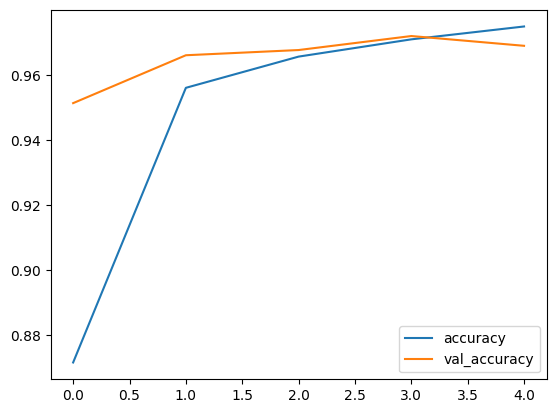

In [ ]:
print("Ritika S")
print("212221240046")
metrics[['accuracy','val_accuracy']].plot()

Ritika S
212221240046


<Axes: >

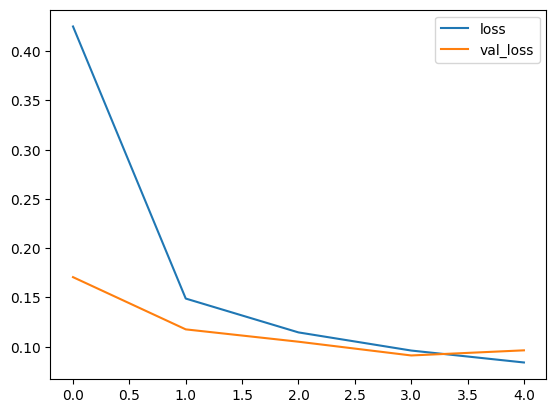

In [ ]:
print("Ritika S")
print("212221240046")
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 952    0   19    0    0    3    5    0    0    1]
 [   0 1123    2    4    0    0    3    2    1    0]
 [   1    9 1001    8    2    0    0    9    0    2]
 [   0    0    2  999    0    3    1    4    1    0]
 [   0    8    2    0  959    0    0    2    1   10]
 [   1    0    0   32    0  847    7    0    2    3]
 [  10    4    0    0    7    5  928    1    3    0]
 [   1    2    6    8    1    0    0 1002    1    7]
 [   4    5   12    6    4    4    3    6  911   19]
 [   2    2    1    8    9    5    0   13    2  967]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.94      0.99      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.95      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**Prediction for a single input**



In [ ]:
img = image.load_img('img5.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('img5.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
print(x_single_prediction)

[6]


Ritika S
212221240046


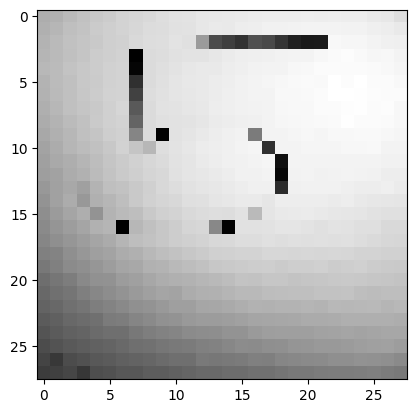

In [ ]:
print("Ritika S")
print("212221240046")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
print(x_single_prediction)

[6]
